# Part A

# 1 Data Understanding & Exploration

In [1]:
#A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable

import pandas as pd

Carname = pd.read_csv('Car name.csv')

In [2]:
#B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

Caratt = pd.read_json('Car-Attributes.json')

In [3]:
#C. Merge both the DataFrames together to form a single DataFrame

# Ensure that both dataframes have the same number of rows
if len(Carname) == len(Caratt):
    # Merge the dataframes based on index
    merged_car = pd.concat([Carname, Caratt], axis=1)
else:
    print("The dataframes have different numbers of rows and cannot be merged based on index.")

# Save the merged dataframe to a new CSV file
merged_car.to_csv('merged_car.csv', index=False)

# Display the merged dataframe
print(merged_car.head())


                    car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1


In [4]:
#D. Print 5 point summary of the numerical features and share insights

merged_car.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# 2 Data Preparation & Analysis

In [5]:
#A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 

# Calculate the percentage of missing values for each column
missing_data_percentage = merged_car.isnull().mean() * 100

# Print the feature-wise percentage of missing values
print("Feature-wise percentage of missing values:")
print(missing_data_percentage)


Feature-wise percentage of missing values:
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [6]:
#B. Check for duplicate values in the data and impute with the best suitable approach

# Step 1: Check for Duplicate Rows
duplicate_rows = merged_car.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())


# Step 2: (Optional) If you want to analyze the duplicates before removing, you can do so as follows
if duplicate_rows.sum() > 0:
    duplicate_rows_data = merged_car[duplicate_rows]
    print("Data for duplicate rows:")
    print(duplicate_rows_data)


Number of duplicate rows: 0


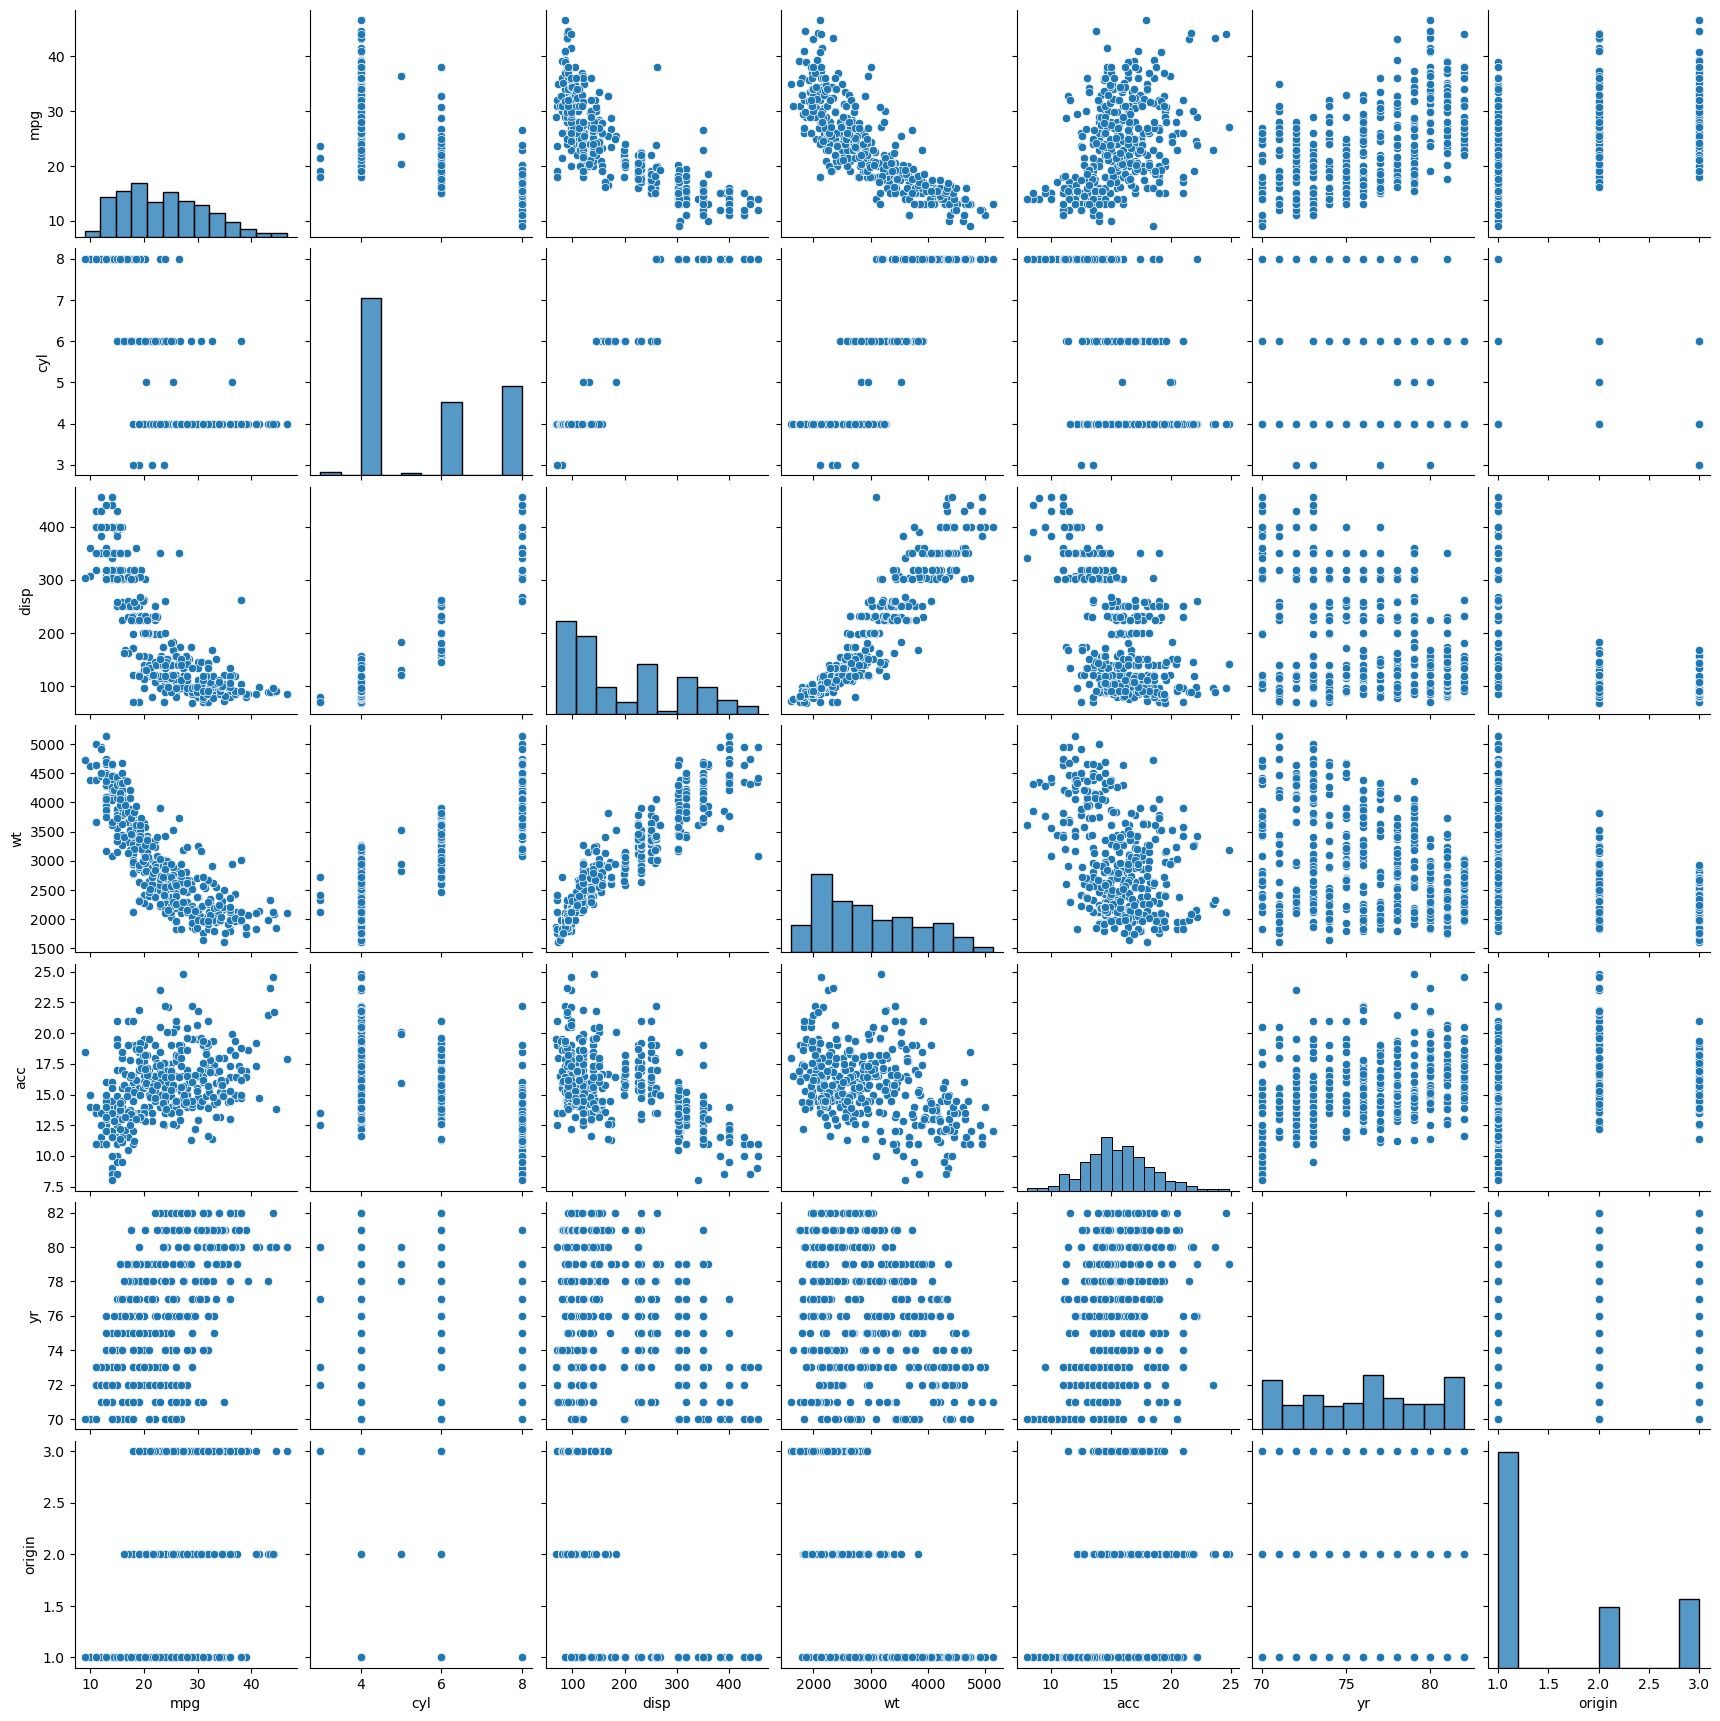

In [8]:
#C. Plot a pairplot for all features

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(merged_car)
plt.show()


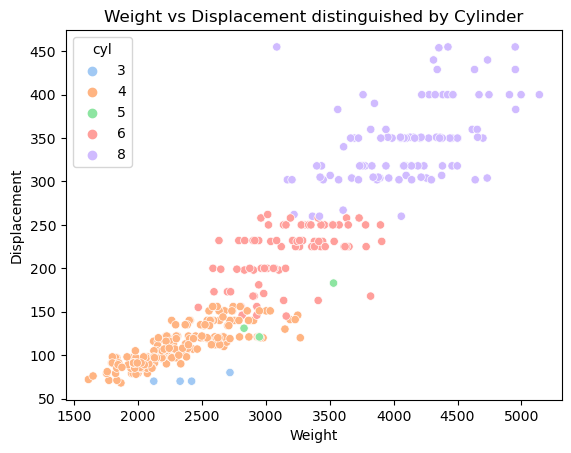

In [9]:
#D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='wt', y='disp', hue='cyl', data=merged_car, palette='pastel')
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.title('Weight vs Displacement distinguished by Cylinder')
plt.show()

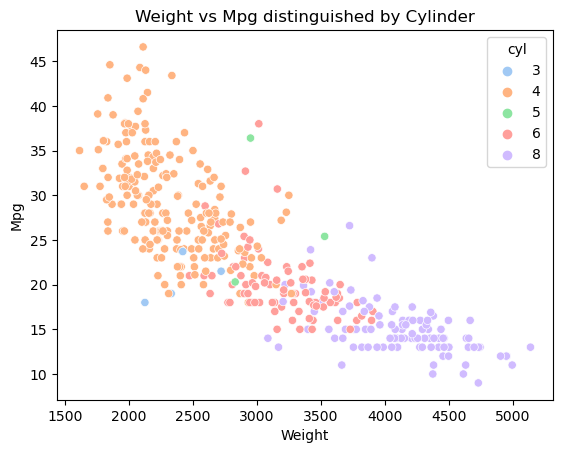

In [11]:
#F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

sns.scatterplot(x='wt', y='mpg', hue='cyl', data=merged_car, palette='pastel')
plt.xlabel('Weight')
plt.ylabel('Mpg')
plt.title('Weight vs Mpg distinguished by Cylinder')
plt.show()


              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
Unique values in car_name: ['chevrolet chevelle malibu' 'buick skylark 320' 'plym

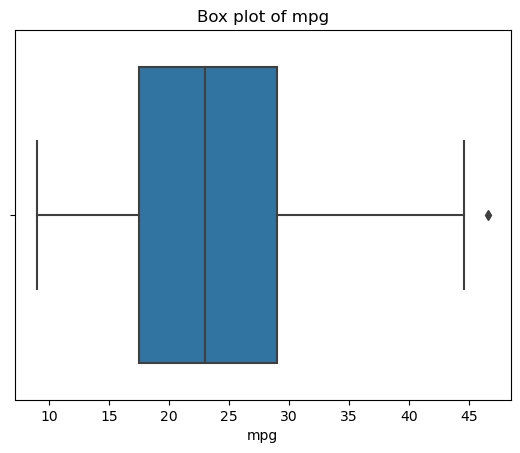

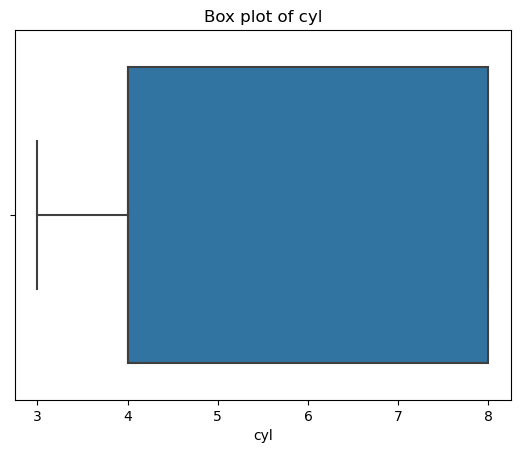

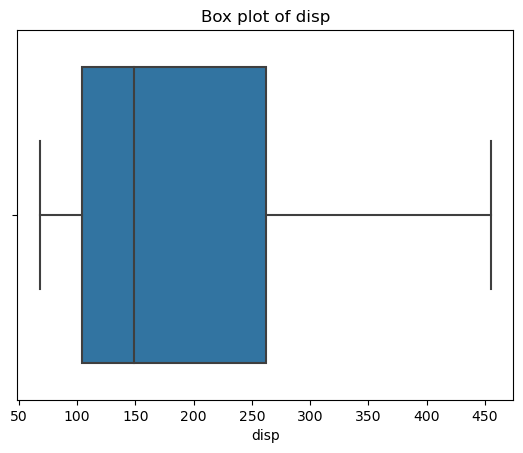

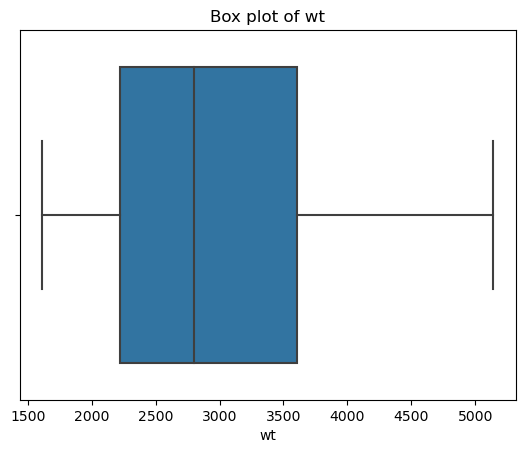

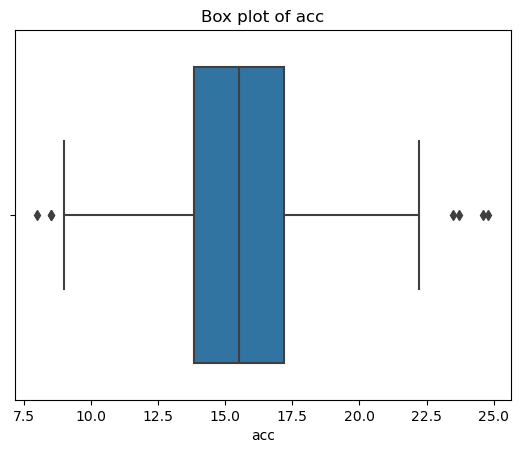

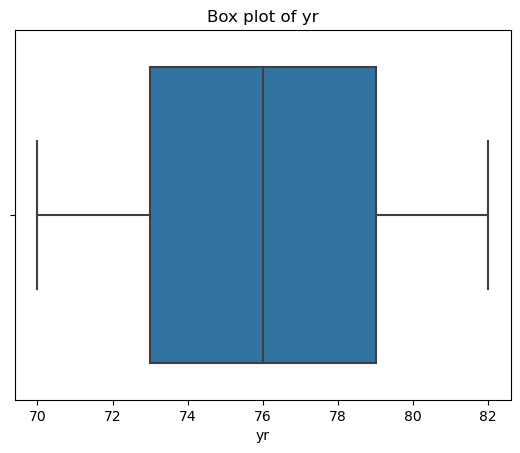

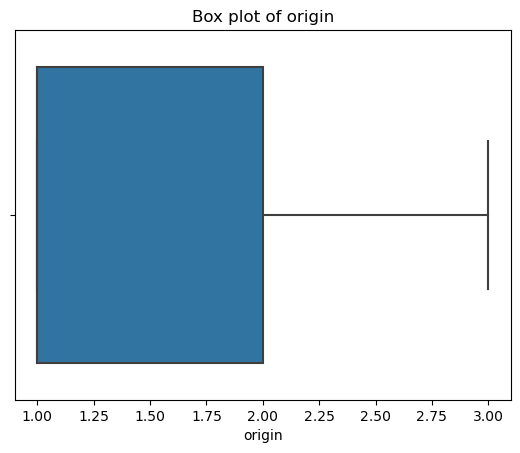

In [12]:
#H. Check for unexpected values in all the features and datapoints with such values

# Step 1: Statistical Summary
print(merged_car.describe())

# Step 2: Unique Values
for col in merged_car.columns:
    print(f"Unique values in {col}: {merged_car[col].unique()}")
    print("-" * 50)  # This will print a line of 50 dashes after each column's unique values

# Step 3: Checking for Outliers - using boxplots
import matplotlib.pyplot as plt
import seaborn as sns

for col in merged_car.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x=merged_car[col])
    plt.title(f'Box plot of {col}')
    plt.show()



In [13]:
#H. Check for unexpected values in all the features and datapoints with such values

import numpy as np

merged_car['hp'].replace('?', np.nan, inplace=True)

# Converting 'hp' column to float temporarily to calculate the median
merged_car['hp'] = merged_car['hp'].astype(float)

merged_car['hp'].fillna(merged_car['hp'].median(), inplace=True)

# Converting 'hp' column back to int64 type
merged_car['hp'] = merged_car['hp'].astype('int64')

print("Unique values in the 'hp' column:", merged_car['hp'].unique())



Unique values in the 'hp' column: [130 165 150 140 198 220 215 225 190 170 160  95  97  85  88  46  87  90
 113 200 210 193  93 100 105 175 153 180 110  72  86  70  76  65  69  60
  80  54 208 155 112  92 145 137 158 167  94 107 230  49  75  91 122  67
  83  78  52  61 148 129  96  71  98 115  53  81  79 120 152 102 108  68
  58 149  89  63  48  66 139 103 125 133 138 135 142  77  62 132  84  64
  74 116  82]


# 3 Clustering

C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

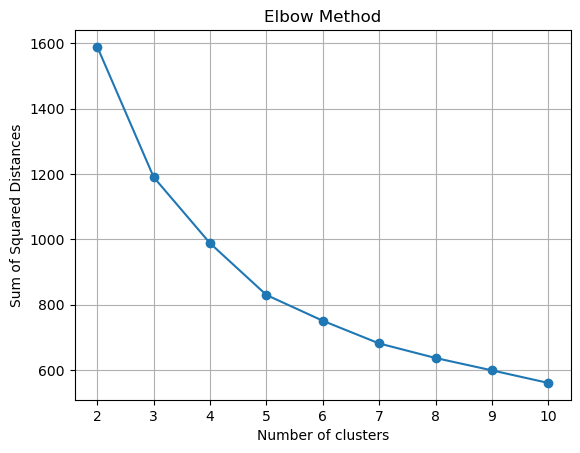

In [14]:
#A. Apply K-Means clustering for 2 to 10 clusters

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = merged_car.select_dtypes(include=['int64', 'float64'])  # Selecting numerical columns
X = StandardScaler().fit_transform(X)  # Standardizing the data
ssd = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    ssd.append(kmeans.inertia_)
plt.figure()
plt.plot(range(2, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

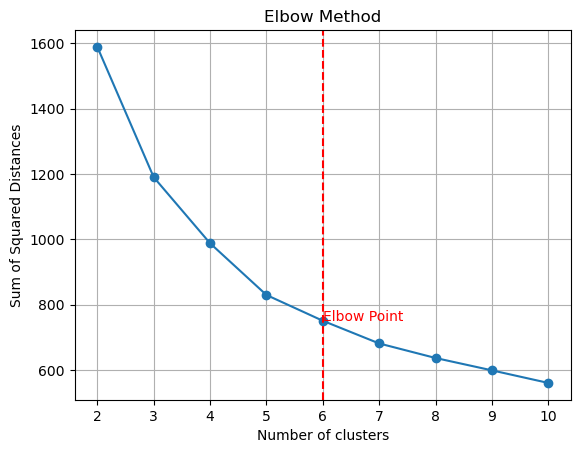

In [15]:
#B. Plot a visual and find elbow point

# Step 5: Plot the elbow graph
plt.figure()
plt.plot(range(2, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)

# Highlight the potential elbow point (let's assume it's at k=3 for this script, but you should determine it visually)
elbow_point = 6
plt.axvline(x=elbow_point, color='r', linestyle='--')
plt.text(elbow_point, ssd[elbow_point-2], 'Elbow Point', color='r')

plt.show()

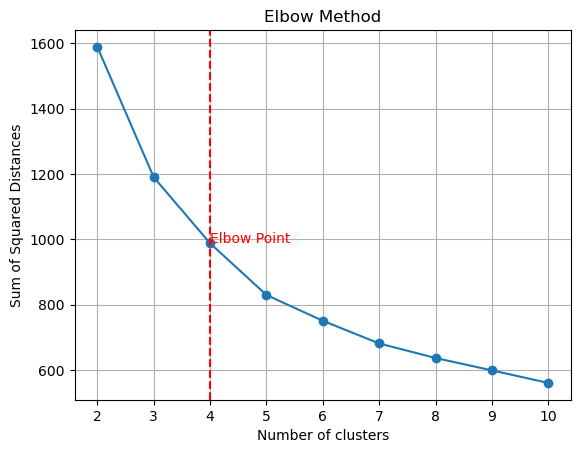

In [16]:
#B. Plot a visual and find elbow point

# Step 5: Plot the elbow graph
plt.figure()
plt.plot(range(2, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)

# Highlight the potential elbow point (let's assume it's at k=3 for this script, but you should determine it visually)
elbow_point = 4
plt.axvline(x=elbow_point, color='r', linestyle='--')
plt.text(elbow_point, ssd[elbow_point-2], 'Elbow Point', color='r')

plt.show()

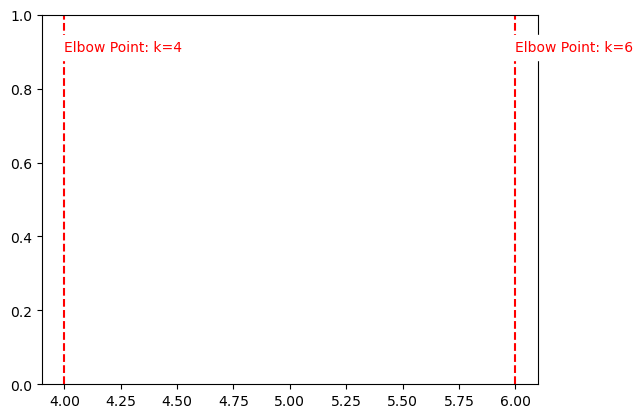

In [17]:
#C. On the above visual, highlight which are the possible Elbow points

possible_elbow_points = [4, 6]

for elbow_point in possible_elbow_points:
    plt.axvline(x=elbow_point, color='r', linestyle='--')
    y_value = plt.gca().get_ylim()[1] * 0.9  # Getting the upper limit of the y-axis and using 90% of that as the y-coordinate
    plt.text(elbow_point, y_value, f'Elbow Point: k={elbow_point}', color='r', rotation=0, backgroundcolor='white')

plt.show()



In [18]:
#D. Train a K-means clustering model once again on the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparing the data
X = merged_car.select_dtypes(include=['int64', 'float64'])  # Selecting numerical columns
X = StandardScaler().fit_transform(X)  # Standardizing the data

# Training the model with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(X)

# The cluster labels for each data point can be found in kmeans_4.labels_
print("Cluster labels for 4 clusters: ", kmeans_4.labels_)

# Training the model with 6 clusters
kmeans_6 = KMeans(n_clusters=6, random_state=0).fit(X)

# The cluster labels for each data point can be found in kmeans_6.labels_
print("Cluster labels for 6 clusters: ", kmeans_6.labels_)


C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster labels for 4 clusters:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 0 0 0 0 2 1 1 1 1 0 0 0 0 2 2 2 2
 2 1 1 1 1 1 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 2 0 0 0
 0 0 2 0 1 1 0 0 0 0 1 0 0 1 2 2 2 2 0 0 0 0 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 2 2 2 2 0 0 0 3 2 2 2 2 0 0 0 0 0 1 0 0 2 1 1 1 1 3 3 3 0 3 1
 2 1 1 2 2 2 2 1 1 1 1 3 2 0 2 3 3 3 3 0 0 0 3 3 3 3 3 2 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 1 1 3 3 3 3 0 2 2 0 0 2 0 2 3 3 2 2 2 2 2 2 1 1 1 1 1 2 1 3 3 3
 3 2 2 3 2 3 3 3 3 3 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 3 3 3
 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3]


C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster labels for 6 clusters:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 3 3 3 0 4 4 0 4 0 3 1 1 1 1 0 4 0 4 3 3 3 3
 3 1 1 1 1 1 1 1 3 4 3 3 4 0 4 0 4 2 4 4 0 4 4 4 4 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 4 4 4 4 0 0 4 0 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 4 1 1 1 1 3 0 4 0
 0 4 3 0 1 1 4 0 0 0 1 0 0 1 3 3 3 3 2 4 2 4 3 3 3 1 1 1 1 1 0 0 0 2 2 4 0
 0 0 0 0 3 3 3 3 1 1 1 1 3 3 3 3 3 3 1 0 4 3 4 0 0 0 3 0 3 0 0 0 0 2 0 0 5
 4 0 1 1 1 1 3 3 3 3 4 4 0 2 3 3 3 3 0 2 0 5 0 1 4 0 3 1 1 1 1 2 5 2 5 2 1
 3 1 1 3 3 3 3 1 1 1 1 0 5 2 5 5 5 2 0 0 0 0 2 5 2 2 2 3 1 1 3 3 3 5 3 3 3
 3 3 3 1 3 1 1 5 0 0 5 0 5 5 0 0 3 0 3 2 2 3 3 5 3 3 3 1 1 3 1 1 3 1 2 2 5
 5 3 3 4 3 5 5 2 2 5 5 5 5 2 2 5 2 5 5 5 3 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2
 0 0 2 5 2 5 5 5 5 5 2 5 2 2 2 2 2 5 5 5 2 2 2 2 2 2 5 5 0 0 3 3 3 3 5 5 5
 5 5 5 5 5 2 2 2 5 5 2 2 2 2 2 2 5 5 5 3 2 5 5 5 2 5 5 5]


In [19]:
#E. Add a new feature in the DataFrame which will have labels based upon cluster value

merged_car['Cluster_Labels_4'] = kmeans_4.labels_
merged_car['Cluster_Labels_6'] = kmeans_6.labels_

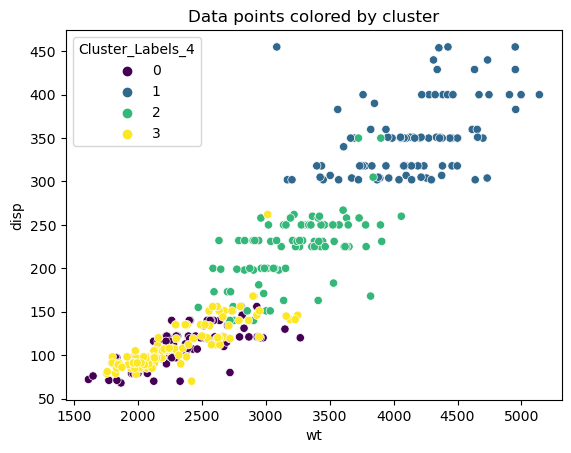

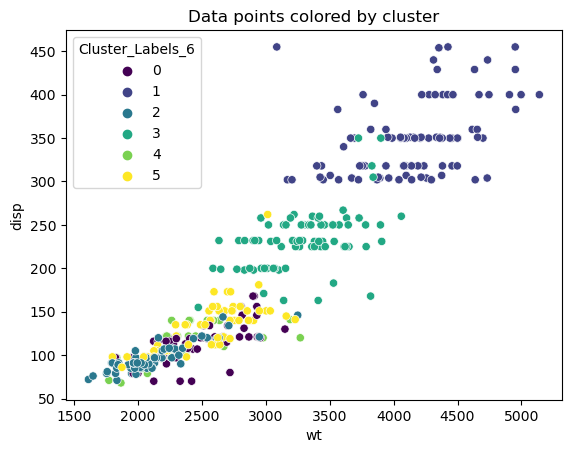

In [21]:
#F. Plot a visual and color the datapoints based upon clusters

sns.scatterplot(x='wt', y='disp', hue='Cluster_Labels_4', data=merged_car, palette='viridis')
plt.title('Data points colored by cluster')
plt.show()

sns.scatterplot(x='wt', y='disp', hue='Cluster_Labels_6', data=merged_car, palette='viridis')
plt.title('Data points colored by cluster')
plt.show()

In [24]:
merged_car.dtypes

car_name             object
mpg                 float64
cyl                   int64
disp                float64
hp                    int64
wt                    int64
acc                 float64
yr                    int64
origin                int64
Cluster_Labels_4      int32
Cluster_Labels_6      int32
dtype: object

In [29]:
#G. Pass a new DataPoint and predict which cluster it belongs to.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaler.fit(merged_car[['wt', 'disp']])

kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(scaler.transform(merged_car[['wt', 'disp']]))

new_data = merged_car.loc[100, ['wt', 'disp']].values

new_data_standardized = scaler.transform([new_data])

predicted_cluster = kmeans_4.predict(new_data_standardized)
print("The new data point belongs to cluster:", predicted_cluster[0])



C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


The new data point belongs to cluster: 1


C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Part B

# 1. Data Understanding & Cleaning

In [30]:
#A. Read ‘vehicle.csv’ and save as DataFrame

import pandas as pd

Vehicle_df = pd.read_csv('vehicle.csv')

In [35]:
#B. Check percentage of missing values and impute with correct approach

from sklearn.impute import SimpleImputer

# B. Check percentage of missing values and impute with correct approach

# Calculate missing percentage
missing_percentage = Vehicle_df.isnull().sum() * 100 / len(Vehicle_df)
print(missing_percentage)

# Identify columns to impute
columns_to_impute = missing_percentage[missing_percentage > 0].index.tolist()

# Separate columns into numerical and categorical based on data type
numerical_cols_with_nan = [col for col in columns_to_impute if Vehicle_df[col].dtype != 'object']
categorical_cols_with_nan = [col for col in columns_to_impute if Vehicle_df[col].dtype == 'object']

# Create imputers for numerical and categorical columns
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Impute missing values in numerical columns, if any
if numerical_cols_with_nan:
    Vehicle_df[numerical_cols_with_nan] = imputer_num.fit_transform(Vehicle_df[numerical_cols_with_nan])

# Impute missing values in categorical columns, if any
if categorical_cols_with_nan:
    Vehicle_df[categorical_cols_with_nan] = imputer_cat.fit_transform(Vehicle_df[categorical_cols_with_nan])





compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64


C:\Users\Rigved Hebbalkar\AppData\Local\Temp\ipykernel_18796\1965661655.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (index, value) in enumerate(class_percentage.iteritems()):


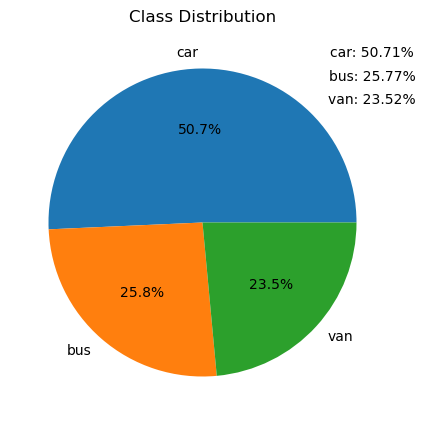

In [36]:
#C. Visualize a Pie-chart and print percentage of values for variable ‘class’

import matplotlib.pyplot as plt

class_counts = Vehicle_df['class'].value_counts()
class_percentage = (class_counts / class_counts.sum()) * 100
plt.figure(figsize=(5, 5))
class_counts.plot(kind='pie', autopct='%1.1f%%')
for i, (index, value) in enumerate(class_percentage.iteritems()):
    plt.text(x=1.1, y=1.1-i*0.15, s=f"{index}: {value:.2f}%", horizontalalignment='center', verticalalignment='center')

plt.title('Class Distribution')
plt.ylabel('')  # This is to remove the column name from the y-axis
plt.show()


In [37]:
#D. Check for duplicate rows in the data and impute with correct approach

duplicate_rows = Vehicle_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

if duplicate_rows.sum() > 0:
    print("Displaying duplicate rows:")
    print(Vehicle_df[duplicate_rows])

Vehicle_df = Vehicle_df.drop_duplicates()

duplicate_rows = Vehicle_df.duplicated()
print(f"Number of duplicate rows after removal: {duplicate_rows.sum()}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


# 2 Data Preparation

In [38]:
#A. Split data into X and Y

from sklearn.model_selection import train_test_split

X = Vehicle_df.drop('class', axis=1) # Drop the target variable to create the feature set
Y = Vehicle_df['class'] # The target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data has been split into training and testing sets.")


Data has been split into training and testing sets.


In [39]:
#B. Standardize the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

print("Data has been standardized.")


Data has been standardized.


# 3 Model Building

In [43]:
#A. Train a base Classification model using SVM

from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_base = SVC(kernel='linear', random_state=42)

svm_base.fit(X_train_standardized, Y_train)


SVC(kernel='linear', random_state=42)

In [44]:
#B. Print Classification metrics for train data

Y_train_pred = svm_base.predict(X_train_standardized)

print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

         bus       0.94      0.96      0.95       166
         car       0.98      0.97      0.97       351
         van       0.97      0.97      0.97       159

    accuracy                           0.97       676
   macro avg       0.96      0.97      0.96       676
weighted avg       0.97      0.97      0.97       676



In [45]:
#C. Apply PCA on the data with 10 components

from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_train_pca_10 = pca.fit_transform(X_train_standardized)


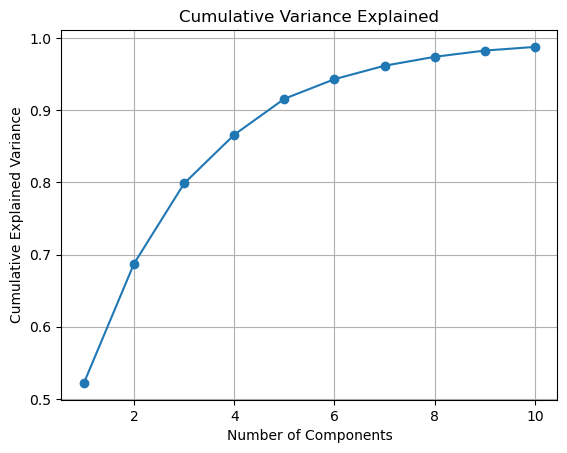

In [46]:
#D. Visualize Cumulative Variance Explained with Number of Components

import matplotlib.pyplot as plt

# Plot the explained variance
plt.figure()
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Text(6, 0.91, '90% threshold')

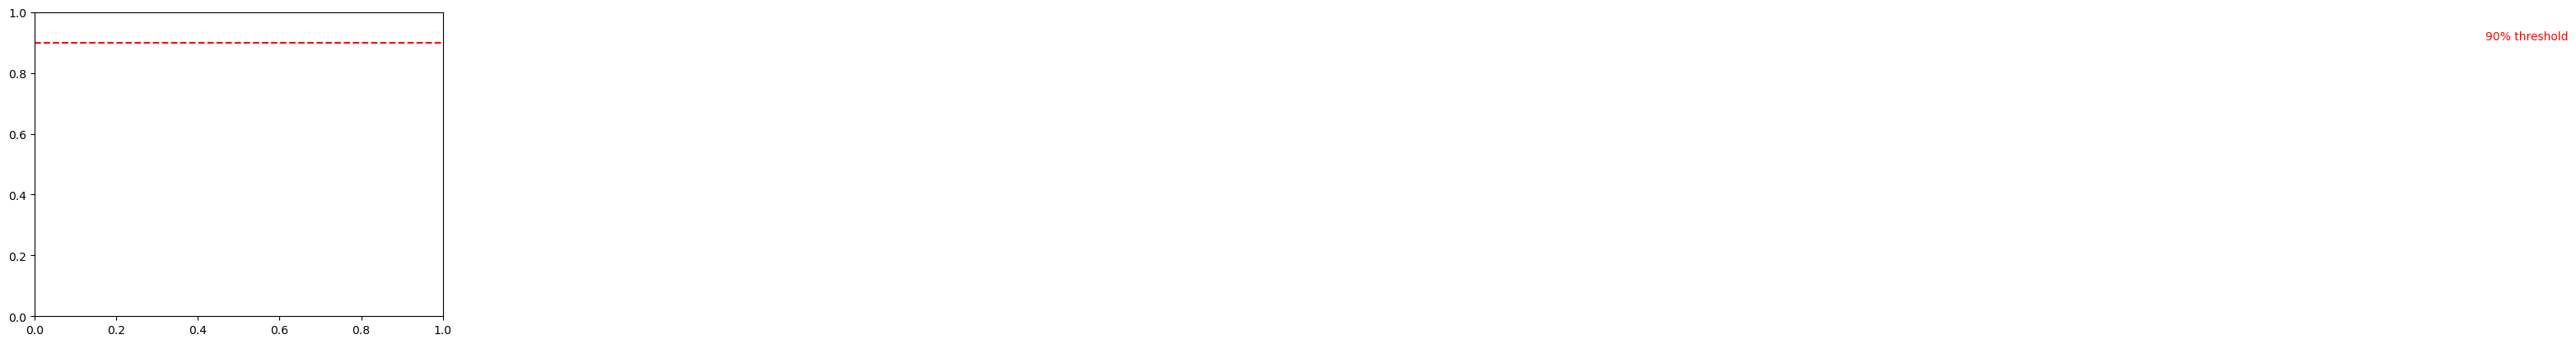

In [47]:
#E. Draw a horizontal line on the above plot to highlight the threshold of 90%

plt.axhline(y=0.9, color='r', linestyle='--')
plt.text(6, 0.91, '90% threshold', color = 'red')


In [48]:
#F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

pca_90 = PCA(n_components=0.9)
X_train_pca_90 = pca_90.fit_transform(X_train_standardized)


In [49]:
#G. Train SVM model on components selected from above step

svm_pca_90 = SVC(kernel='linear', random_state=42)
svm_pca_90.fit(X_train_pca_90, Y_train)


SVC(kernel='linear', random_state=42)

In [50]:
#H. Print Classification metrics for train data of above model and share insights

Y_train_pred_pca_90 = svm_pca_90.predict(X_train_pca_90)
print(classification_report(Y_train, Y_train_pred_pca_90))


              precision    recall  f1-score   support

         bus       0.58      0.54      0.56       166
         car       0.76      0.83      0.79       351
         van       0.57      0.50      0.54       159

    accuracy                           0.68       676
   macro avg       0.64      0.62      0.63       676
weighted avg       0.67      0.68      0.68       676



# 4 Performance Improvement

In [51]:
#A. Train another SVM on the components out of PCA. Tune the parameters to improve performance

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

# Initialize a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Fit the model with the parameter options
grid.fit(X_train_pca_90, Y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [52]:
#B Share best Parameters observed from above step

print("Best parameters found: ", grid.best_params_)


Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [53]:
#C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights

Y_train_pred_grid = grid.predict(X_train_pca_90)
print(classification_report(Y_train, Y_train_pred_grid))


              precision    recall  f1-score   support

         bus       0.89      0.86      0.88       166
         car       0.92      0.93      0.92       351
         van       0.83      0.84      0.83       159

    accuracy                           0.89       676
   macro avg       0.88      0.88      0.88       676
weighted avg       0.89      0.89      0.89       676



# 5 Data Understanding & Cleaning